# ***Gym Fitness Prediction App   - Giriraj Gautam***

### **Python**

In [ ]:
# code to predict calories burned based on user input


def predicting_calories_burned(Session_duration, Gender, Age, Avg_BPM, Height, Weight):
  if Gender.lower() == 'male':                              # for male
    bmr = 10 * Weight + 6.25 * Height - 5 * Age + 5

  else:                                                      #  for female
    bmr = 10 * Weight + 6.25 * Height - 5 * Age - 161

   # Estimating MET factor based on average BPM
  if Avg_BPM < 60:
    met_factor = 1.2
  elif 60 <= Avg_BPM < 90:
    met_factor = 3.0
  elif 90 <= Avg_BPM < 120:
    met_factor = 5.5
  else:
    met_factor = 8.0

  calories_burned = (Session_duration * bmr * met_factor) / 1440
  return calories_burned

# Getting user input for prediction

Age = int(input("Enter your age: "))
Gender = input("Enter your gender (Male/Female): ").lower()  # to uncapitalize the words
Weight = float(input("Enter your weight (kg): "))
Height = float(input("Enter your height (cm): "))
Session_duration = float(input("Enter the duration of the activity (minutes): "))
Avg_BPM = float(input("Enter the average BPM during the activity: "))


calories = predicting_calories_burned(Age, Gender, Weight, Height, Session_duration, Avg_BPM)
print(f"\n\n\nPredicted calories burned: {calories:.2f} kcal")

Enter your age: 25
Enter your gender (Male/Female): MALE
Enter your weight (kg): 56
Enter your height (cm): 345
Enter the duration of the activity (minutes): 50
Enter the average BPM during the activity: 234



Predicted calories burned: 330.21 kcal


# **Data Handling and Machine Learning**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler

In [ ]:
# loading given dataset

given="https://raw.githubusercontent.com/sayande01/Kaggle_Notebooks/refs/heads/main/gym_members_exercise_tracking.csv"
dataset=pd.read_csv(given)

In [ ]:
# printing first few rows (to check structure)

print(dataset.head(3))

   Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0         HIIT            33.9   
2                      1.11            677.0       Cardio            33.4   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                    3.5                              4                 3   
1                    2.1                              4                 2   
2                    2.3                              4                 2   

     BMI  
0  30.20  
1  32.00  
2  24.71  


In [ ]:
# to check about missing values

print(dataset.isnull().sum())

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64


In [ ]:
# defining X and y

y = dataset['Calories_Burned']
X = dataset.drop(['Calories_Burned', 'Workout_Type', 'Gender'], axis=1)

In [ ]:
print(X.head(2))

   Age  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56         88.3        1.71      180      157           60   
1   46         74.9        1.53      179      151           66   

   Session_Duration (hours)  Fat_Percentage  Water_Intake (liters)  \
0                      1.69            12.6                    3.5   
1                      1.30            33.9                    2.1   

   Workout_Frequency (days/week)  Experience_Level   BMI  
0                              4                 3  30.2  
1                              4                 2  32.0  


In [ ]:
from sklearn.model_selection import train_test_split


scaler=StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2509)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

In [ ]:
class RegressionModel(nn.Module):
  def __init__(self):
    super(RegressionModel, self).__init__()
    self.layer1=nn.Linear(12,1)

  def forward(self,x):
    x=self.layer1(x)
    return x

In [ ]:
model:RegressionModel=RegressionModel()


In [ ]:

loss = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

In [ ]:
train_loss=[]
test_loss=[]
train_accuracy=[]
train_loss=[]

In [ ]:
num_epochs = 5000
train_losses = []  # Initializing the list for storing training losses
test_losses = []  # Initializing the list for storing test losses

for ep in range(num_epochs):
    model.train()     # Training model

    # Forward pass
    predicted_y = model(X_train_tensor).squeeze()
    y_train = y_train_tensor.squeeze()
    losses = loss(predicted_y, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()    # Zero the gradients before the backward pass
    losses.backward()       # Backpropagation
    optimizer.step()         # Update the model parameters

    # Print training loss every 100 epochs
    if ep % 100 == 0:
        print(f"Epoch [{ep}/{num_epochs}], Training Loss: {losses.item()}")

    train_losses.append(losses.item())      # Append the training loss to the list

    # Evaluate on test set
    model.eval()  # Set model to evaluation mode

    with torch.no_grad():  # No gradients needed for evaluation
        predicted_y_test = model(X_test_tensor).squeeze()
        y_test=y_test_tensor.squeeze()
        test_loss = loss(predicted_y_test, y_test_tensor)

    # Append the test loss to the list
    test_losses.append(test_loss.item())

    # Print test loss every 100 epochs
    if ep % 100 == 0:
        print(f"Epoch [{ep}/{num_epochs}], Test Loss: {test_loss.item()}")

Epoch [0/5000], Training Loss: 886918.5625
Epoch [0/5000], Test Loss: 900863.75
Epoch [100/5000], Training Loss: 259500.1875
Epoch [100/5000], Test Loss: 252231.328125
Epoch [200/5000], Training Loss: 82286.7578125
Epoch [200/5000], Test Loss: 79579.53125
Epoch [300/5000], Training Loss: 28286.74609375
Epoch [300/5000], Test Loss: 27591.177734375
Epoch [400/5000], Training Loss: 11385.0869140625
Epoch [400/5000], Test Loss: 11294.451171875
Epoch [500/5000], Training Loss: 5853.48828125
Epoch [500/5000], Test Loss: 5915.4130859375
Epoch [600/5000], Training Loss: 3890.80029296875
Epoch [600/5000], Test Loss: 3977.145263671875
Epoch [700/5000], Training Loss: 3101.016845703125
Epoch [700/5000], Test Loss: 3180.12060546875
Epoch [800/5000], Training Loss: 2729.7275390625
Epoch [800/5000], Test Loss: 2796.460693359375
Epoch [900/5000], Training Loss: 2527.67138671875
Epoch [900/5000], Test Loss: 2583.234375
Epoch [1000/5000], Training Loss: 2405.19970703125
Epoch [1000/5000], Test Loss: 24

In [ ]:
predicted_y_test = predicted_y_test.numpy()  # Convert PyTorch tensor to numpy
y_test = y_test_tensor.numpy()  # Convert PyTorch tensor to numpy

# Create a dictionary with the two arrays
d = {'y_pred': predicted_y_test.flatten(), 'y_test': y_test.flatten()}

# Create a DataFrame
df = pd.DataFrame(d)

# Print the DataFrame
print(df)

          y_pred  y_test
0     738.047729   796.0
1     604.532776   643.0
2     815.531311   740.0
3     256.281647   331.0
4    1070.452881  1151.0
..           ...     ...
239   257.689697   330.0
240   989.200256   977.0
241  1382.202026  1345.0
242  1008.578003  1017.0
243   671.093628   707.0

[244 rows x 2 columns]


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, predicted_y_test)
mae = mean_absolute_error(y_test, predicted_y_test)
r2 = r2_score(y_test, predicted_y_test)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 2102.429443359375
Mean Absolute Error (MAE): 35.98392105102539
R-squared (R²): 0.9721274971961975


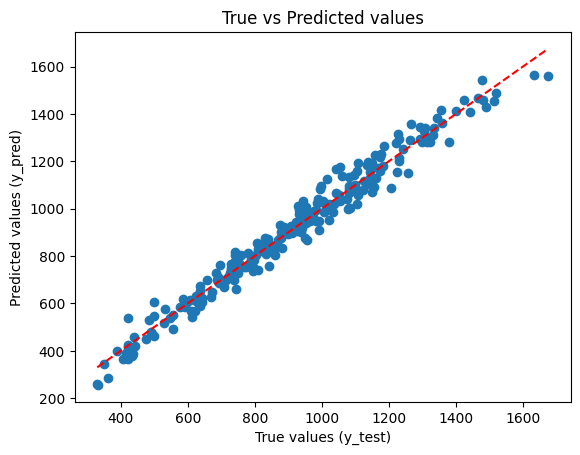

In [ ]:




import matplotlib.pyplot as plt

plt.scatter(y_test, predicted_y_test)
plt.xlabel("True values (y_test)")
plt.ylabel("Predicted values (y_pred)")
plt.title("True vs Predicted values")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linestyle='--')
plt.show()